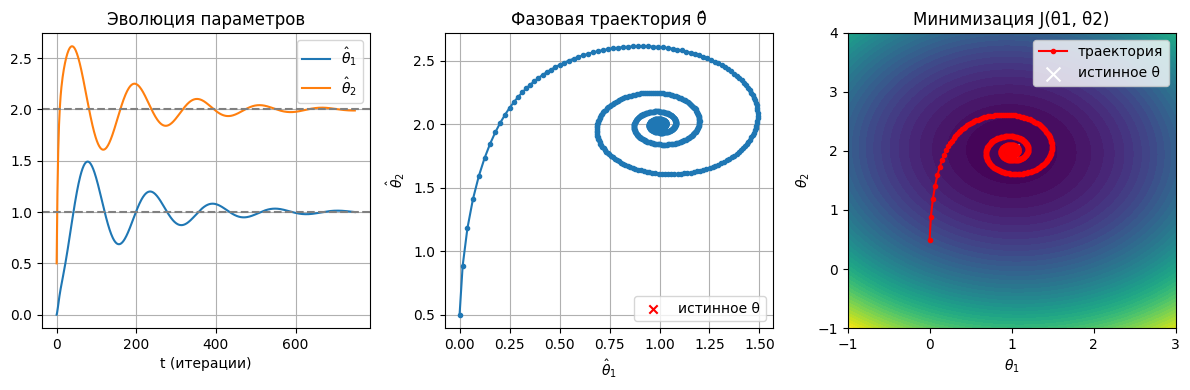

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# --- Исходные данные ---
np.random.seed(0)
theta_true = np.array([1.0, 2.0])      # Истинные параметры
t = np.linspace(0, 30, 750)
x = np.vstack((np.sin(t), np.cos(t)))  # x = [sin(t), cos(t)]
y = theta_true @ x

# --- Параметры обучения ---
theta_hat = np.zeros(2)   # Начальное приближение
alpha = 0.25           # Шаг обучения
theta_history = []
J_history = []

# --- Итерации градиентного спуска ---
for i in range(len(t)):
    x_t = x[:, i]
    y_hat = np.dot(theta_hat, x_t)
    error = y[i] - y_hat
    grad = -x_t * error       # ∂J/∂θ = -x * (y - x^Tθ)
    theta_hat -= alpha * grad # обновление
    J = 0.5 * error**2

    theta_history.append(theta_hat.copy())
    J_history.append(J)

theta_history = np.array(theta_history)

# --- Визуализация θ1(t), θ2(t) ---
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(theta_history[:, 0], label=r'$\hat{\theta}_1$')
plt.plot(theta_history[:, 1], label=r'$\hat{\theta}_2$')
plt.axhline(theta_true[0], color='gray', linestyle='--')
plt.axhline(theta_true[1], color='gray', linestyle='--')
plt.xlabel('t (итерации)')
plt.title('Эволюция параметров')
plt.legend()
plt.grid(True)

# --- Визуализация фазы θ1(θ2) ---
plt.subplot(1, 3, 2)
plt.plot(theta_history[:, 0], theta_history[:, 1], '-o', markersize=3)
plt.scatter(theta_true[0], theta_true[1], c='red', marker='x', label='истинное θ')
plt.xlabel(r'$\hat{\theta}_1$')
plt.ylabel(r'$\hat{\theta}_2$')
plt.title('Фазовая траектория θ̂')
plt.legend()
plt.grid(True)

# --- Поверхность J(θ1, θ2) ---
θ1 = np.linspace(-1, 3, 100)
θ2 = np.linspace(-1, 4, 100)
Θ1, Θ2 = np.meshgrid(θ1, θ2)
J_surf = np.zeros_like(Θ1)

for i in range(len(t)):
    x_t = x[:, i].reshape(-1, 1)
    y_t = y[i]
    J_surf += 0.5 * (y_t - (Θ1 * x_t[0] + Θ2 * x_t[1]))**2
J_surf /= len(t)

plt.subplot(1, 3, 3)
plt.contourf(Θ1, Θ2, J_surf, levels=50, cmap='viridis')
plt.plot(theta_history[:, 0], theta_history[:, 1], 'r.-', label='траектория')
plt.scatter(theta_true[0], theta_true[1], c='white', marker='x', s=100, label='истинное θ')
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$\theta_2$')
plt.title('Минимизация J(θ1, θ2)')
plt.legend()
plt.grid(False)

plt.tight_layout()
plt.show()

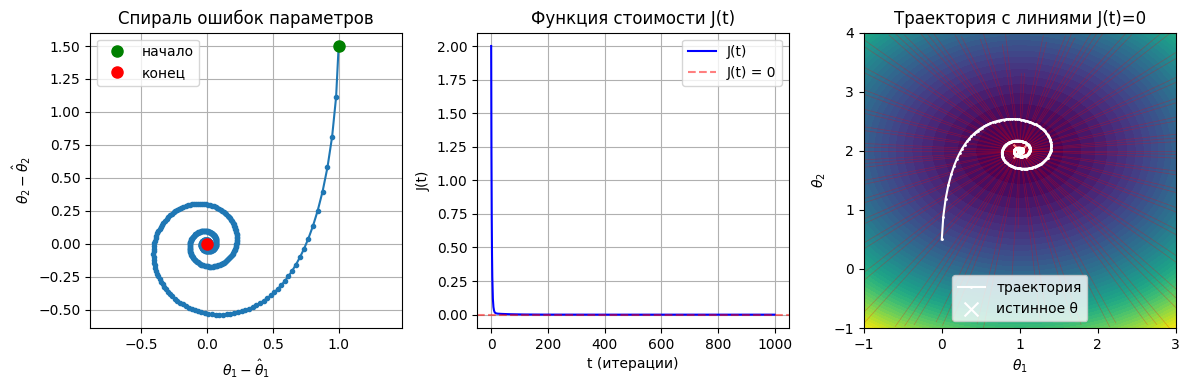

In [5]:
# --- Визуализация ошибок параметров ---
plt.figure(figsize=(12, 4))

# График ошибок theta1 - theta1_hat, theta2 - theta2_hat
plt.subplot(1, 3, 1)
theta1_error = theta_true[0] - theta_history[:, 0]
theta2_error = theta_true[1] - theta_history[:, 1]
plt.plot(theta1_error, theta2_error, '-o', markersize=3)
plt.plot(theta1_error[0], theta2_error[0], 'go', markersize=8, label='начало')
plt.plot(theta1_error[-1], theta2_error[-1], 'ro', markersize=8, label='конец')
plt.xlabel(r'$\theta_1 - \hat{\theta}_1$')
plt.ylabel(r'$\theta_2 - \hat{\theta}_2$')
plt.title('Спираль ошибок параметров')
plt.legend()
plt.grid(True)
plt.axis('equal')

# --- Визуализация J(t) = 0 в каждый момент времени ---
plt.subplot(1, 3, 2)
t_points = np.arange(len(t))
plt.plot(t_points, J_history, 'b-', label='J(t)')
plt.axhline(0, color='red', linestyle='--', alpha=0.5, label='J(t) = 0')
plt.xlabel('t (итерации)')
plt.ylabel('J(t)')
plt.title('Функция стоимости J(t)')
plt.legend()
plt.grid(True)

# --- Фазовая траектория с линиями J(t) = 0 ---
plt.subplot(1, 3, 3)
plt.contourf(Θ1, Θ2, J_surf, levels=50, cmap='viridis')

# Добавляем линии J(t) = 0 для каждого момента времени
for i in range(0, len(t), 20):  # рисуем каждую 20-ю линию для наглядности
    x_t = x[:, i]
    # Линия J(t) = 0: y = θ1*x1 + θ2*x2
    θ1_line = np.linspace(-1, 3, 100)
    θ2_line = (y[i] - θ1_line * x_t[0]) / x_t[1] if x_t[1] != 0 else np.full_like(θ1_line, 0)
    
    # Отображаем только те отрезки, которые в пределах графика
    mask = (θ2_line >= -1) & (θ2_line <= 4)
    if np.any(mask):
        plt.plot(θ1_line[mask], θ2_line[mask], 'r-', alpha=0.3, linewidth=0.5)

plt.plot(theta_history[:, 0], theta_history[:, 1], 'w.-', label='траектория', markersize=2)
plt.scatter(theta_true[0], theta_true[1], c='white', marker='x', s=100, label='истинное θ')
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$\theta_2$')
plt.title('Траектория с линиями J(t)=0')
plt.legend()
plt.grid(False)

plt.tight_layout()
plt.show()

In [13]:
import matplotlib.animation as animation

# Создаем фигуру для анимации
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Первый график: эволюция параметров
ax1 = axes[0, 0]
ax1.set_xlabel('t (итерации)')
ax1.set_title('Эволюция параметров')
ax1.axhline(theta_true[0], color='gray', linestyle='--')
ax1.axhline(theta_true[1], color='gray', linestyle='--')
ax1.grid(True)

# Второй график: фазовая траектория
ax2 = axes[0, 1]
ax2.set_xlabel(r'$\hat{\theta}_1$')
ax2.set_ylabel(r'$\hat{\theta}_2$')
ax2.set_title('Фазовая траектория θ̂')
ax2.scatter(theta_true[0], theta_true[1], c='red', marker='x', label='истинное θ')
ax2.grid(True)

# Третий график: спираль ошибок
ax3 = axes[1, 0]
ax3.set_xlabel(r'$\theta_1 - \hat{\theta}_1$')
ax3.set_ylabel(r'$\theta_2 - \hat{\theta}_2$')
ax3.set_title('Спираль ошибок параметров')
ax3.grid(True)
ax3.axis('equal')

# Четвертый график: поверхность с линией J(t)=0
ax4 = axes[1, 1]
contour = ax4.contourf(Θ1, Θ2, J_surf, levels=50, cmap='viridis')
ax4.scatter(theta_true[0], theta_true[1], c='white', marker='x', s=100, label='истинное θ')
ax4.set_xlabel(r'$\theta_1$')
ax4.set_ylabel(r'$\theta_2$')
ax4.set_title('Минимизация J(θ1, θ2)')
ax4.grid(False)

# Инициализация анимации
def init():
    ax1.plot([], [], label=r'$\hat{\theta}_1$')[0],
    ax1.plot([], [], label=r'$\hat{\theta}_2$')[0],
    ax2.plot([], [], '-o', markersize=3)[0],
    ax3.plot([], [], '-o', markersize=3)[0],
    ax4.plot([], [], 'r.-')[0],
    return []

# Функция анимации
def animate(frame):
    ax1.clear()
    ax2.clear()
    ax3.clear()
    ax4.clear()
    
    # Восстанавливаем фон
    ax1.axhline(theta_true[0], color='gray', linestyle='--')
    ax1.axhline(theta_true[1], color='gray', linestyle='--')
    ax2.scatter(theta_true[0], theta_true[1], c='red', marker='x', label='истинное θ')
    ax4.contourf(Θ1, Θ2, J_surf, levels=50, cmap='viridis')
    ax4.scatter(theta_true[0], theta_true[1], c='white', marker='x', s=100, label='истинное θ')
    
    # Текущие данные до кадра
    current_theta = theta_history[:frame+1]
    current_errors = theta_true - current_theta
    
    # График 1: эволюция параметров
    ax1.plot(current_theta[:, 0], 'b-', label=r'$\hat{\theta}_1$')
    ax1.plot(current_theta[:, 1], 'g-', label=r'$\hat{\theta}_2$')
    ax1.set_xlabel('t (итерации)')
    ax1.set_title('Эволюция параметров')
    ax1.legend()
    ax1.grid(True)
    
    # График 2: фазовая траектория
    ax2.plot(current_theta[:, 0], current_theta[:, 1], '-o', markersize=3)
    ax2.set_xlabel(r'$\hat{\theta}_1$')
    ax2.set_ylabel(r'$\hat{\theta}_2$')
    ax2.set_title('Фазовая траектория θ̂')
    ax2.legend()
    ax2.grid(True)
    
    # График 3: спираль ошибок
    ax3.plot(current_errors[:, 0], current_errors[:, 1], '-o', markersize=3)
    ax3.plot(current_errors[0, 0], current_errors[0, 1], 'go', markersize=8, label='начало')
    ax3.plot(current_errors[frame, 0], current_errors[frame, 1], 'ro', markersize=8, label='текущая')
    ax3.set_xlabel(r'$\theta_1 - \hat{\theta}_1$')
    ax3.set_ylabel(r'$\theta_2 - \hat{\theta}_2$')
    ax3.set_title('Спираль ошибок параметров')
    ax3.legend()
    ax3.grid(True)
    ax3.axis('equal')
    
    # График 4: поверхность с линией J(t)=0
    ax4.contourf(Θ1, Θ2, J_surf, levels=50, cmap='viridis')
    ax4.plot(current_theta[:, 0], current_theta[:, 1], 'w.-', markersize=2)
    
    # Добавляем линию J(t)=0 для текущего момента
    if frame < len(t):
        x_t = x[:, frame]
        θ1_line = np.linspace(-1, 3, 100)
        θ2_line = (y[frame] - θ1_line * x_t[0]) / x_t[1] if x_t[1] != 0 else np.full_like(θ1_line, 0)
        mask = (θ2_line >= -1) & (θ2_line <= 4)
        if np.any(mask):
            ax4.plot(θ1_line[mask], θ2_line[mask], 'r-', linewidth=2, label=f'J(t={frame})=0')
    
    ax4.scatter(theta_true[0], theta_true[1], c='white', marker='x', s=100)
    ax4.set_xlabel(r'$\theta_1$')
    ax4.set_ylabel(r'$\theta_2$')
    ax4.set_title('Траектория с линией J(t)=0')
    ax4.legend()
    ax4.grid(False)
    
    return []

# Создаем анимацию
anim = animation.FuncAnimation(fig, animate, frames=len(t), 
                             init_func=init, blit=True, interval=50)

# Сохраняем в GIF
anim.save('gradient_descent_animation.gif', writer='pillow', fps=20)

plt.close()

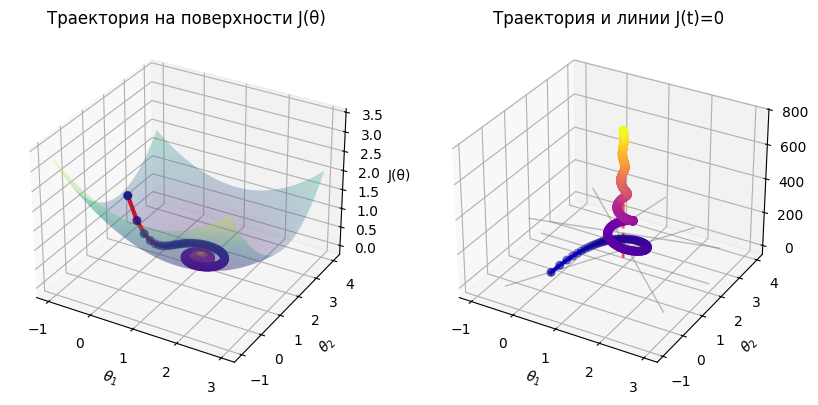

In [23]:
from mpl_toolkits.mplot3d import Axes3D

# Создаем 3D график
fig = plt.figure(figsize=(10, 5))

# График 2: Траектория с поверхностью J
ax2 = fig.add_subplot(121, projection='3d')
# Создаем сетку для поверхности J (усредненной по всем t)
θ1_3d = np.linspace(-1, 3, 50)
θ2_3d = np.linspace(-1, 4, 50)
Θ1_3d, Θ2_3d = np.meshgrid(θ1_3d, θ2_3d)
J_avg = np.zeros_like(Θ1_3d)

for i in range(len(t)):
    x_t = x[:, i].reshape(-1, 1)
    y_t = y[i]
    J_avg += 0.5 * (y_t - (Θ1_3d * x_t[0] + Θ2_3d * x_t[1]))**2
J_avg /= len(t)

# Поверхность J
ax2.plot_surface(Θ1_3d, Θ2_3d, J_avg, alpha=0.3, cmap='viridis')
# Траектория
ax2.plot(theta_history[:, 0], theta_history[:, 1], J_history, 'r-', linewidth=3)
ax2.scatter(theta_history[:, 0], theta_history[:, 1], J_history, c=t_points, cmap='plasma', s=30)
ax2.set_xlabel(r'$\theta_1$')
ax2.set_ylabel(r'$\theta_2$')
ax2.set_zlabel('J(θ)')
ax2.set_title('Траектория на поверхности J(θ)')

# График 3: Развертка по времени с линиями J(t)=0
ax3 = fig.add_subplot(122, projection='3d')

# Отображаем несколько линий J(t)=0 для разных моментов времени
for t_idx in [0, 50, 100, 150, 199]:
    x_t = x[:, t_idx]
    y_t = y[t_idx]
    
    # Линия J(t)=0: y_t = θ1*x1 + θ2*x2
    θ1_line = np.linspace(-1, 3, 50)
    θ2_line = (y_t - θ1_line * x_t[0]) / x_t[1] if x_t[1] != 0 else np.full_like(θ1_line, 0)
    
    # Отображаем только в пределах графика
    mask = (θ2_line >= -1) & (θ2_line <= 4)
    if np.any(mask):
        ax3.plot(θ1_line[mask], θ2_line[mask], np.full_like(θ1_line[mask], t_idx), 
                'gray', alpha=0.5, linewidth=1)

# Траектория
ax3.plot(theta_history[:, 0], theta_history[:, 1], t_points, 'b-', linewidth=3)
ax3.scatter(theta_history[:, 0], theta_history[:, 1], t_points, c=t_points, cmap='plasma', s=30)

# Истинное значение
ax3.plot([theta_true[0]], [theta_true[1]], [0, len(t_points)-1], 
         'r--', alpha=0.7, linewidth=2)

ax3.set_xlabel(r'$\theta_1$')
ax3.set_ylabel(r'$\theta_2$')
ax3.set_zlabel('t')
ax3.set_title('Траектория и линии J(t)=0')

plt.show()

Running DREM...
Running DRE...

=== FINAL RESULTS ===
True parameters: θ1 = 1.0, θ2 = 2.0

DREM final estimates: θ1 = 1.000000, θ2 = 2.000000
DRE final estimates:  θ1 = 1.000000, θ2 = 2.000000

DREM final error: 0.000000
DRE final error:  0.000000

=== CONVERGENCE SPEED (to error < 0.01) ===
DREM convergence time: 32.78s
DRE convergence time:  23.30s

=== PARAMETER-WISE COMPARISON ===
θ1 - DREM error: 0.000000
θ1 - DRE error:  0.000000
θ2 - DREM error: 0.000000
θ2 - DRE error:  0.000000

DREM provides -1853.7% reduction in final error compared to DRE


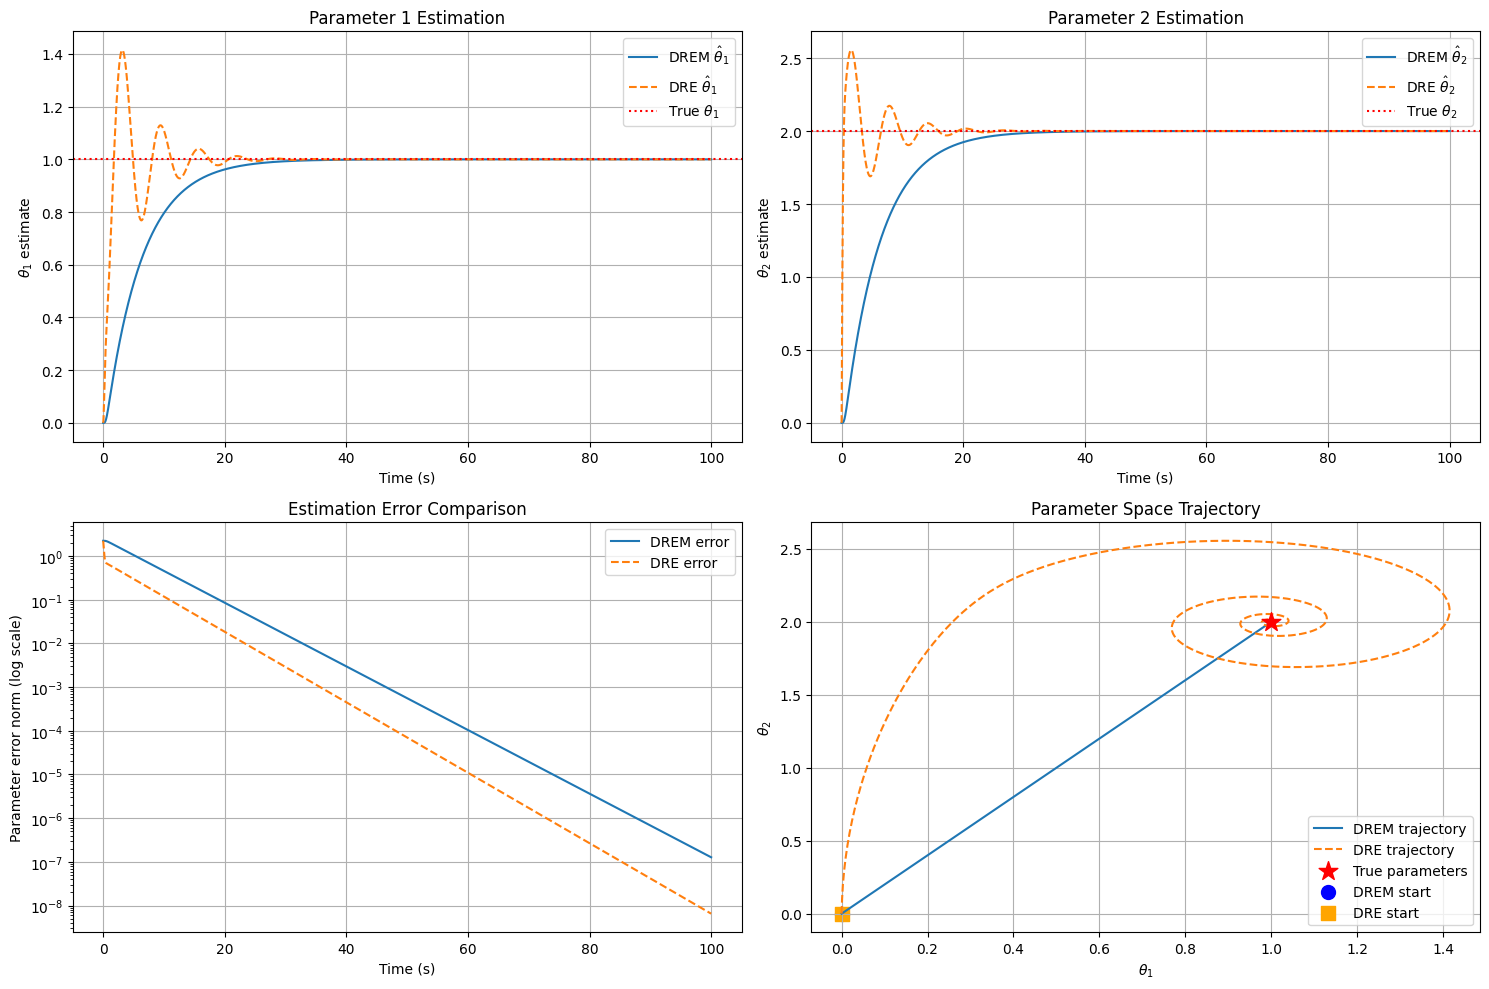

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
T = 100.0
dt = 0.01
N = int(T/dt)
t = np.linspace(0, T, N)

# True parameters
theta_true = np.array([1.0, 2.0])

# Regressor x(t)
phi = np.vstack([np.sin(t), np.cos(t)])  # shape (2, N)

# Output y(t)
y = (phi.T @ theta_true).flatten()  # shape (N,)

# Common settings
alpha = 0.05  # filter coefficient
gamma = 5.0   # adaptation gain

# DREM implementation
print("Running DREM...")
phi_f_drem = np.zeros((2,))
y_f_drem = 0.0
theta_hat_drem = np.zeros((2, N))
theta_hat_drem[:, 0] = np.array([0.0, 0.0])

for k in range(1, N):
    phi_k = phi[:, k]
    y_k = y[k]

    # Filtering
    phi_f_drem = (1 - alpha) * phi_f_drem + alpha * phi_k
    y_f_drem = (1 - alpha) * y_f_drem + alpha * y_k

    # Extended regressor matrix
    Phi_ext = np.array([phi_k, phi_f_drem])
    Y_ext = np.array([y_k, y_f_drem])

    # DREM mixing
    Delta = np.linalg.det(Phi_ext)
    if np.linalg.norm(Phi_ext) < 1e-12:
        adj = np.zeros((2,2))
    else:
        a, b = Phi_ext[0,0], Phi_ext[0,1]
        c, d = Phi_ext[1,0], Phi_ext[1,1]
        adj = np.array([[d, -b], [-c, a]])

    psi = adj @ Y_ext

    # Parameter update
    theta_prev = theta_hat_drem[:, k-1].copy()
    theta_dot = gamma * Delta * (psi - Delta * theta_prev)
    theta_hat_drem[:, k] = theta_prev + theta_dot * dt

# DRE implementation (without mixing)
print("Running DRE...")
phi_f_dre = np.zeros((2,))
y_f_dre = 0.0
theta_hat_dre = np.zeros((2, N))
theta_hat_dre[:, 0] = np.array([0.0, 0.0])

for k in range(1, N):
    phi_k = phi[:, k]
    y_k = y[k]

    # Filtering (same as DREM)
    phi_f_dre = (1 - alpha) * phi_f_dre + alpha * phi_k
    y_f_dre = (1 - alpha) * y_f_dre + alpha * y_k

    # DRE update without mixing - using extended regressor directly
    Phi_ext = np.array([phi_k, phi_f_dre])
    Y_ext = np.array([y_k, y_f_dre])
    
    # Standard gradient update for extended system
    theta_prev = theta_hat_dre[:, k-1].copy()
    error = Y_ext - Phi_ext @ theta_prev
    theta_dot = gamma * Phi_ext.T @ error
    theta_hat_dre[:, k] = theta_prev + theta_dot * dt

# Calculate errors
error_drem = np.linalg.norm(theta_hat_drem - theta_true.reshape(-1, 1), axis=0)
error_dre = np.linalg.norm(theta_hat_dre - theta_true.reshape(-1, 1), axis=0)

# Results comparison
print("\n=== FINAL RESULTS ===")
print(f"True parameters: θ1 = {theta_true[0]}, θ2 = {theta_true[1]}")
print(f"\nDREM final estimates: θ1 = {theta_hat_drem[0, -1]:.6f}, θ2 = {theta_hat_drem[1, -1]:.6f}")
print(f"DRE final estimates:  θ1 = {theta_hat_dre[0, -1]:.6f}, θ2 = {theta_hat_dre[1, -1]:.6f}")
print(f"\nDREM final error: {error_drem[-1]:.6f}")
print(f"DRE final error:  {error_dre[-1]:.6f}")

# Convergence metrics
drem_convergence_time = np.argmax(error_drem < 0.01)
dre_convergence_time = np.argmax(error_dre < 0.01)

print(f"\n=== CONVERGENCE SPEED (to error < 0.01) ===")
print(f"DREM convergence time: {t[drem_convergence_time]:.2f}s" if drem_convergence_time > 0 else "DREM didn't converge to threshold")
print(f"DRE convergence time:  {t[dre_convergence_time]:.2f}s" if dre_convergence_time > 0 else "DRE didn't converge to threshold")

# Parameter-wise comparison
print(f"\n=== PARAMETER-WISE COMPARISON ===")
print(f"θ1 - DREM error: {abs(theta_hat_drem[0, -1] - theta_true[0]):.6f}")
print(f"θ1 - DRE error:  {abs(theta_hat_dre[0, -1] - theta_true[0]):.6f}")
print(f"θ2 - DREM error: {abs(theta_hat_drem[1, -1] - theta_true[1]):.6f}")
print(f"θ2 - DRE error:  {abs(theta_hat_dre[1, -1] - theta_true[1]):.6f}")

# Performance improvement
if error_dre[-1] > 0:
    improvement = ((error_dre[-1] - error_drem[-1]) / error_dre[-1]) * 100
    print(f"\nDREM provides {improvement:.1f}% reduction in final error compared to DRE")

# Plotting the results
plt.figure(figsize=(15, 10))

# Plot 1: Parameter estimates comparison
plt.subplot(2, 2, 1)
plt.plot(t, theta_hat_drem[0, :], label='DREM $\\hat{\\theta}_1$')
plt.plot(t, theta_hat_dre[0, :], label='DRE $\\hat{\\theta}_1$', linestyle='--')
plt.axhline(y=theta_true[0], color='r', linestyle=':', label='True $\\theta_1$')
plt.xlabel('Time (s)')
plt.ylabel('$\\theta_1$ estimate')
plt.title('Parameter 1 Estimation')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(t, theta_hat_drem[1, :], label='DREM $\\hat{\\theta}_2$')
plt.plot(t, theta_hat_dre[1, :], label='DRE $\\hat{\\theta}_2$', linestyle='--')
plt.axhline(y=theta_true[1], color='r', linestyle=':', label='True $\\theta_2$')
plt.xlabel('Time (s)')
plt.ylabel('$\\theta_2$ estimate')
plt.title('Parameter 2 Estimation')
plt.legend()
plt.grid(True)

# Plot 2: Error norm comparison
plt.subplot(2, 2, 3)
plt.semilogy(t, error_drem, label='DREM error')
plt.semilogy(t, error_dre, label='DRE error', linestyle='--')
plt.xlabel('Time (s)')
plt.ylabel('Parameter error norm (log scale)')
plt.title('Estimation Error Comparison')
plt.legend()
plt.grid(True)

# Plot 3: Phase plot
plt.subplot(2, 2, 4)
plt.plot(theta_hat_drem[0, :], theta_hat_drem[1, :], label='DREM trajectory')
plt.plot(theta_hat_dre[0, :], theta_hat_dre[1, :], label='DRE trajectory', linestyle='--')
plt.scatter([theta_true[0]], [theta_true[1]], color='red', marker='*', s=200, label='True parameters', zorder=5)
plt.scatter([theta_hat_drem[0, 0]], [theta_hat_drem[1, 0]], color='blue', marker='o', s=100, label='DREM start')
plt.scatter([theta_hat_dre[0, 0]], [theta_hat_dre[1, 0]], color='orange', marker='s', s=100, label='DRE start')
plt.xlabel('$\\theta_1$')
plt.ylabel('$\\theta_2$')
plt.title('Parameter Space Trajectory')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()